# Generating Logo for PVSC

### Initial exploration for raw content of docs


In [16]:
import requests
# from https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('(<.*?>)|\\n|\\r|\\t|\(|\)|\{|\}|\]|\[')
    return re.sub(clean, '', text)

r = requests.get(url="https://code.visualstudio.com/docs/python/python-tutorial")
raw_content = r.content.decode("utf-8")

clean_raw_content = remove_html_tags(raw_content)


In [18]:
import requests
from bs4 import BeautifulSoup as bs

r = requests.get(url="https://code.visualstudio.com/docs/python/python-tutorial")
parsed_content = bs(r.text, features="html.parser")
clean_raw_content = ''.join(parsed_content.findAll(text=True))


In [19]:

from wordcloud import WordCloud, STOPWORDS
raw_words = clean_raw_content.split()

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", max_words=2000, 
               stopwords=stopwords).generate(clean_raw_content)


#### Display simple word cloud

(-0.5, 399.5, 199.5, -0.5)

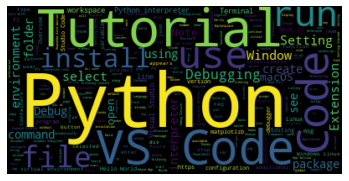

In [5]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Try with Python logo as a Mask

In [6]:
from PIL import Image, ImageFile
import numpy as np
python_mask = np.array(Image.open("images/python-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=python_mask, stopwords=stopwords,  contour_width=3, contour_color='steelblue').generate(clean_raw_content)

Display word cloud with Python mask


(-0.5, 1023.5, 1023.5, -0.5)

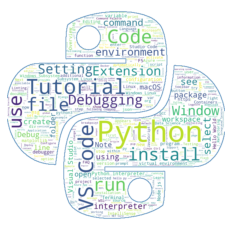

In [7]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Try with coloured Python mask 

In [10]:
from wordcloud import ImageColorGenerator
python_mask = np.array(Image.open("images/python-colored-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=python_mask, stopwords=stopwords,  contour_width=10, contour_color='steelblue').generate(clean_raw_content)
image_colors = ImageColorGenerator(python_mask)

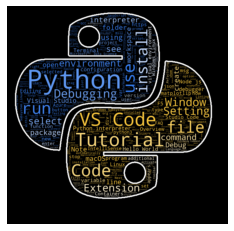

In [11]:
fig, axes = plt.subplots(1,1)

axes.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()